In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
import pandas as pd

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("senhor-maestro").project("lego_sets")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

In [ ]:
{dataset.location}

{'/content/datasets/LEGO_sets-3'}

In [ ]:
%cd {HOME}

/content


In [ ]:
#!yolo task=detect mode=train    model=/content/drive/MyDrive/LEGOfolder/weights_v2_medium_200/weights/best.pt        data={dataset.location}/data.yaml project=/content/drive/MyDrive/LEGOfolder name=weights_v2_medium_300 epochs=100 imgsz=512 rect=True plots=True

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/LEGOfolder/weights_v3_medium_100/weights/best.pt data={dataset.location}/data.yaml project=/content/drive/MyDrive/LEGOfolder name=weights_v3_medium_200 epochs=100 imgsz=1024 rect=True plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/LEGO_sets-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=1024, save=True, cache=False, device=, workers=8, project=/content/drive/MyDrive/LEGOfolder, name=weights_v3_medium_200, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
!yolo task=detect mode=predict model={HOME}/drive/MyDrive/LEGOfolder/weights_v3_medium_200/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True hide_labels=True

2023-05-18 19:52:03.832992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs
image 1/10 /content/datasets/LEGO_sets-3/valid/images/lego14_jpg.rf.5609d371df971a42ad2e4842bc385617.jpg: 800x1024 1 4, 2 6s, 1 9, 2 ages, 2 boxs, 2 logos, 1 set_no, 74.6ms
image 2/10 /content/datasets/LEGO_sets-3/valid/images/lego21_jpeg.rf.0fa48fe16968091fe35ca99a86e36118.jpg: 800x1024 1 0, 1 2, 1 4, 1 5, 1 8, 1 age, 1 box, 1 logo, 1 pcs, 1 set_no, 44.0ms
image 3/10 /content/datasets/LEGO_sets-3/valid/images/lego22_jpg.rf.ae7767bdfb330fdc8a8f4caa5e27018d.jpg: 800x1024 1 0, 1 2, 1 3, 1 4, 1 5, 1 6, 2 ages, 1 box, 1 logo, 1 pcs, 1 set_no, 43.9ms
image 4/10 /content/datasets/LEGO_sets-3/valid/images/lego30_jpg.rf.a0555443cd21f52398e0bc903868ab6e.jpg: 800x1024 1 0, 1 2, 1 4, 2 5s, 1 age, 1 box, 1 logo

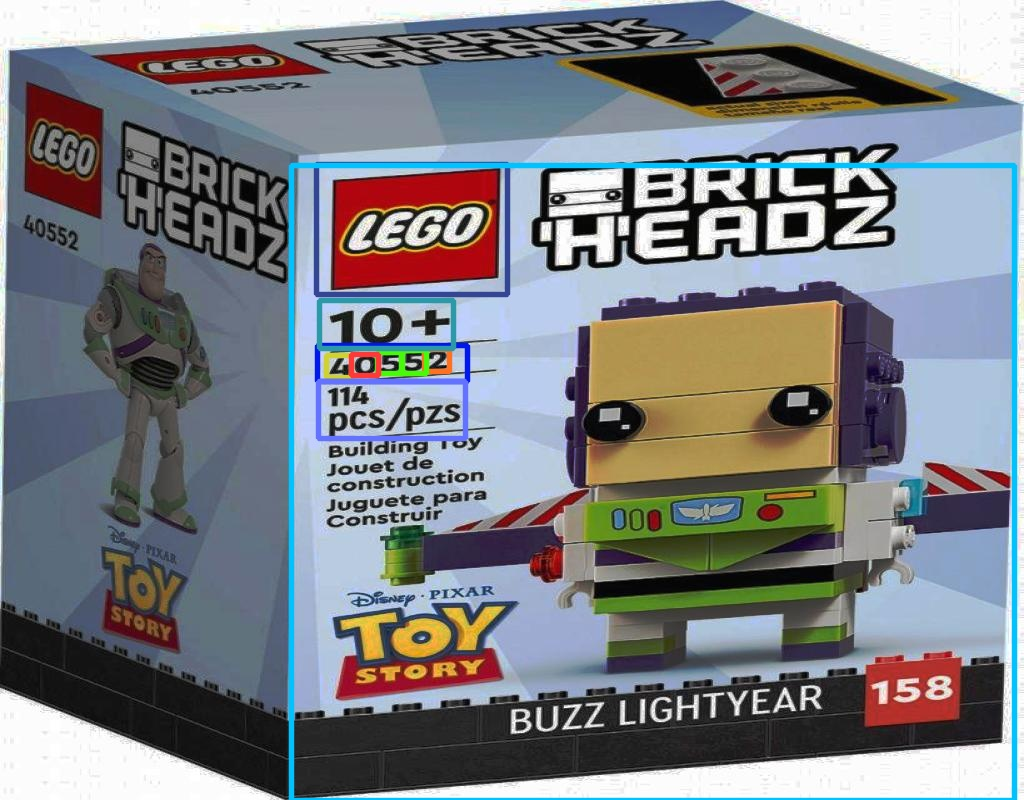

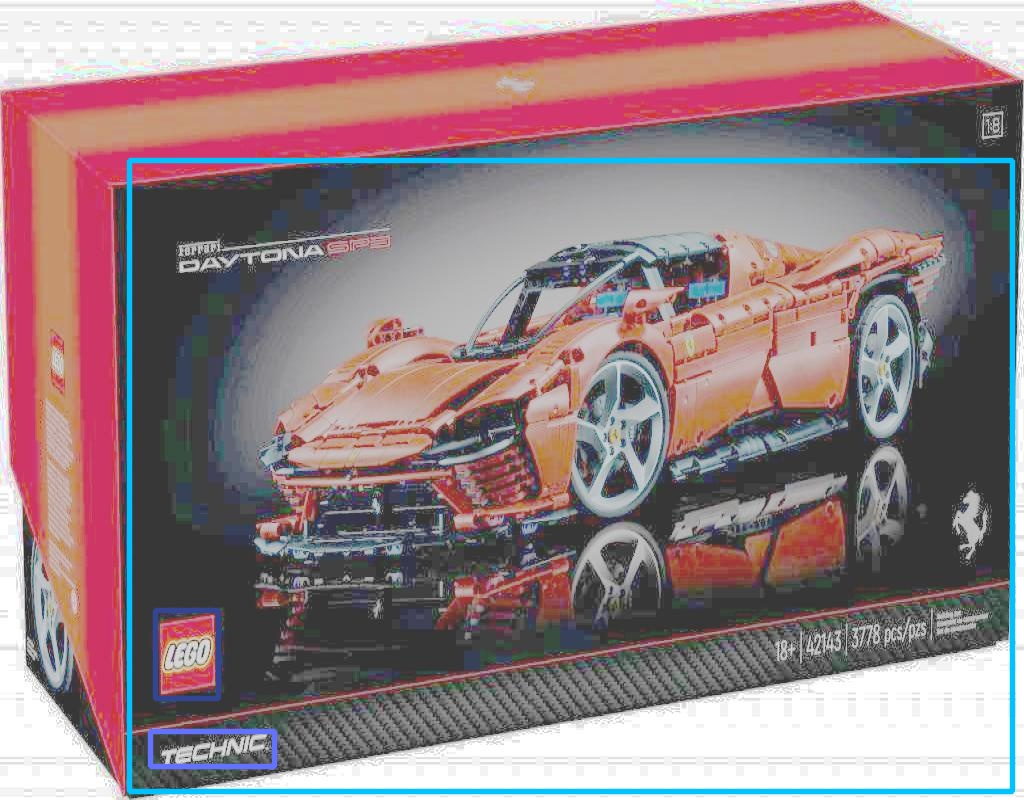

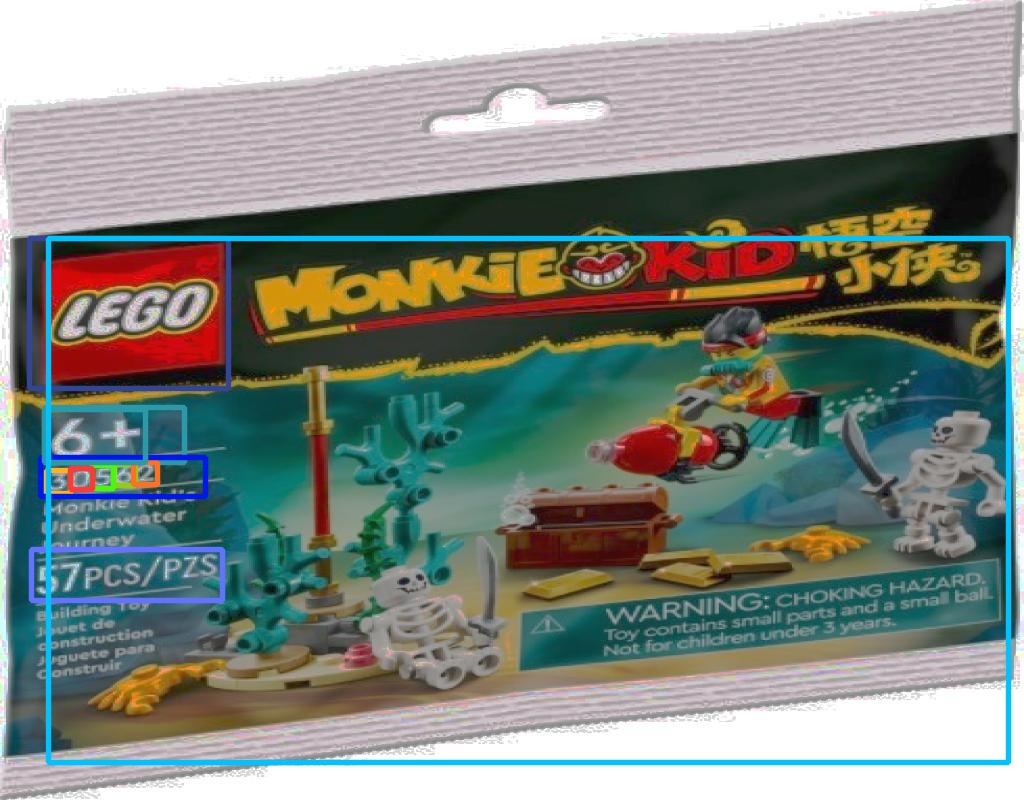

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from PIL import Image
import  cv2

In [ ]:
import torch

# Model
model = YOLO("/content/drive/MyDrive/LEGOfolder/weights_v3_medium_200/weights/best.pt")
        #torch.hub.load('ultralytics/yolov8', "custom",path="/content/drive/MyDrive/LEGOfolder/weights_v2_medium_104/weights/best.pt", trust_repo=False)

# Images
imgs = Image.open('/content/drive/MyDrive/LEGOfolder/dop2/2.jpg')
        #['http://st.bricker.ru/images/store/thumbs/large/album2/6bc9c_phpFdryF9.jpeg']
        #['/content/drive/MyDrive/LEGOfolder/dop2/2.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


tensor([[ 33., 336., 875., 948.]], device='cuda:0')

In [ ]:
boxes.xyxy

tensor([[ 33., 336., 875., 948.],
        [ 71., 496.,  84., 514.],
        [ 34., 328., 140., 437.],
        [ 34., 450.,  94., 490.],
        [ 59., 496.,  72., 513.],
        [ 35., 495.,  46., 513.],
        [ 47., 496.,  59., 514.],
        [ 84., 496.,  96., 514.],
        [ 32., 487., 140., 520.]], device='cuda:0')

In [ ]:
boxes.conf

tensor([0.96887, 0.91036, 0.79021, 0.78790, 0.40251, 0.33994], device='cuda:0')

In [ ]:
boxes.cls

tensor([11., 12., 10., 14.,  6.,  8.], device='cuda:0')

In [ ]:
import pandas as pd

In [ ]:
pic_df = pd.DataFrame(boxes.data.cpu(), columns=['xmin',	'ymin',	'xmax',	'ymax',	'confidence',	'class'])
pic_df['class'] = pic_df['class'].astype('int32')
pic_df

,xmin,ymin,xmax,ymax,confidence,class
0,33.0,336.0,875.0,948.0,0.958229,11
1,71.0,496.0,84.0,514.0,0.901644,8
2,34.0,328.0,140.0,437.0,0.886098,12
3,34.0,450.0,94.0,490.0,0.886002,10
4,59.0,496.0,72.0,513.0,0.878761,2
5,35.0,495.0,46.0,513.0,0.810841,6
6,47.0,496.0,59.0,514.0,0.803519,0
7,84.0,496.0,96.0,514.0,0.766477,8
8,32.0,487.0,140.0,520.0,0.762916,14


In [ ]:
pic_df[pic_df['class']<10].sort_values(by=['xmin'])

,xmin,ymin,xmax,ymax,confidence,class
5,35.0,495.0,46.0,513.0,0.810841,6
6,47.0,496.0,59.0,514.0,0.803519,0
4,59.0,496.0,72.0,513.0,0.878761,2
1,71.0,496.0,84.0,514.0,0.901644,8
7,84.0,496.0,96.0,514.0,0.766477,8


In [ ]:
pic_df[pic_df['class']<10].sort_values(by=['xmin'])['class'].astype('str').tolist()

['6', '0', '2', '8', '8']

In [ ]:
set_number = ''.join(i for i in pic_df[pic_df['class']<10].sort_values(by=['xmin'])['class'].astype('str').tolist())

In [ ]:
set_number

'60288'

In [ ]:
site1 = 'bricker.ru/sets/'+set_number+'/'
site1

'bricker.ru/sets/60288/'

In [ ]:
site2 = 'https://www.lego.com/ru-ru/service/buildinginstructions/'+set_number
site2

'https://www.lego.com/ru-ru/service/buildinginstructions/60288'

In [ ]:
site3 = 'https://www.brickeconomy.com/set/'+set_number+'-1/'
site3

'https://www.brickeconomy.com/set/60288-1/'